## Data loading and preparation

In [2]:
import pickle
import numpy as np
import graph_tool.all as gt
from gensim.models import Word2Vec

In [3]:
with open('../../../dataset_analysis/imgflip_meme_graph.pckl', 'rb') as f:
    meme_graph = pickle.load(f) 
graph_embeddings = Word2Vec.load('../generated_data/skipgram/imgflip_skipgram_2.model')

In [4]:
meme_embeddings = {int(emb_key): graph_embeddings.wv[emb_key] for emb_key in graph_embeddings.wv.vocab.keys()
                   if meme_graph.vp.vertex_type[meme_graph.vertex(int(emb_key))] == 'meme'}

In [5]:
meme_emb_labels = np.array(sorted(meme_embeddings.keys()))
meme_emb_data = np.array([meme_embeddings[emb_key] for emb_key in meme_emb_labels])

## KMeans clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(meme_emb_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans_cluster_ids = kmeans_model.predict(meme_emb_data)

In [153]:
np.unique(kmeans_cluster_ids)

array([0, 1, 2], dtype=int32)

## DBSCAN clustering (too costly...)

In [158]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_model = DBSCAN()
dbscan_model.fit(meme_emb_data)

In [ ]:
kmeans_cluster_ids = kmeans_model.predict(meme_emb_data)

## Evaluation

### Visualization

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.decomposition import PCA

In [155]:
meme_emb_data_low_dim = PCA(2).fit_transform(meme_emb_data)

KMeans

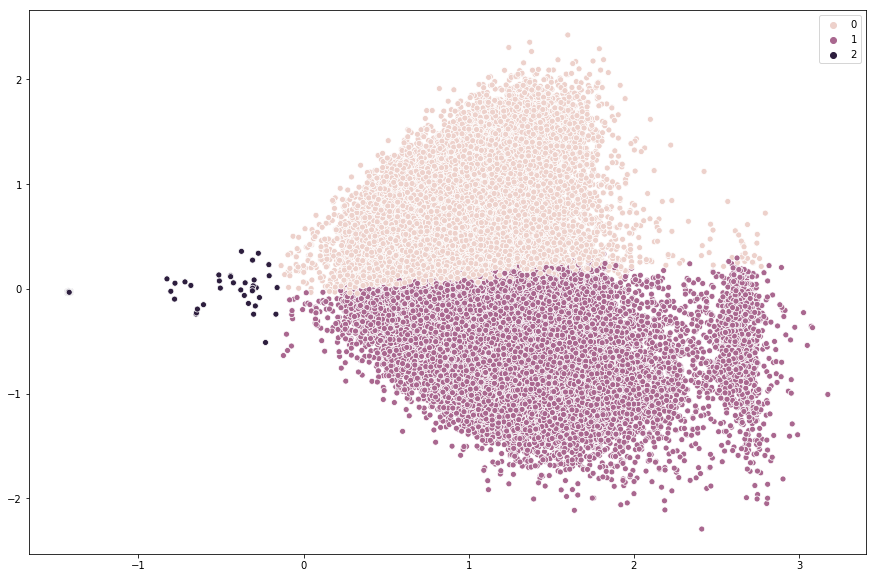

In [156]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
seaborn.scatterplot(*meme_emb_data_low_dim.T, hue=kmeans_cluster_ids, ax=ax)

### Inspecting

In [19]:
import json

In [10]:
def get_meme_url_from_vertex_id(vertex_id, meme_graph):
    return json.loads(meme_graph.vp.vertex_properties[meme_graph.vertex(str(vertex_id))])['url']

KMeans

In [17]:
def print_urls_of_grouped_memes(meme_graph, vertex_ids, grouping_ids, max_urls=5, shuffle=True):
    num_groups = np.unique(grouping_ids).size
    for group_id in range(num_groups):
        print(f'Group {group_id}:')
        member_ids = vertex_ids[grouping_ids == group_id]
        if shuffle:
            np.random.shuffle(member_ids)
        for meme_vertex_id in member_ids[:max_urls]:
            print(get_meme_url_from_vertex_id(meme_vertex_id, meme_graph))

In [20]:
print_urls_of_grouped_memes(meme_graph, meme_emb_labels, kmeans_cluster_ids)

Group 0:
https://imgflip.com/i/2lwp9n
https://imgflip.com/i/2in9m7
https://imgflip.com/i/1zt1mn
https://imgflip.com/i/23i5wb
https://imgflip.com/i/2gus2d
Group 1:
https://imgflip.com/i/2gqflf
https://imgflip.com/i/2geyxf
https://imgflip.com/i/2fj6fl
https://imgflip.com/i/2eo05y
https://imgflip.com/i/22vxby
Group 2:
https://imgflip.com/i/1ux89w
https://imgflip.com/i/1xckyl
https://imgflip.com/i/26zzw6
https://imgflip.com/i/24bg6o
https://imgflip.com/i/2g0lv8


Cosine similarity

In [24]:
def print_similar_meme_urls(meme_id, w2v_graph_embeddings, meme_graph, top_n=10):
    print(f'Chosen meme url: {get_meme_url_from_vertex_id(meme_id, meme_graph)}\n')
    for sim_id, cos_sim in w2v_graph_embeddings.wv.similar_by_word(str(meme_id), top_n):
        print(f'{get_meme_url_from_vertex_id(sim_id, meme_graph)}\tcos similarity: {cos_sim}')

In [27]:
print_similar_meme_urls(meme_emb_labels[0], graph_embeddings, meme_graph)

Chosen meme url: https://imgflip.com/i/2mtuai

https://imgflip.com/i/2ierwi	cos similarity: 0.6680936217308044
https://imgflip.com/i/2j1wcy	cos similarity: 0.6464136838912964
https://imgflip.com/i/2fag65	cos similarity: 0.6449548006057739
https://imgflip.com/i/2lrzgj	cos similarity: 0.6369028091430664
https://imgflip.com/gif/2i2zoo	cos similarity: 0.6051381230354309
https://imgflip.com/i/2ijeka	cos similarity: 0.6011077165603638
https://imgflip.com/i/2l806j	cos similarity: 0.5997638702392578
https://imgflip.com/i/2l8nly	cos similarity: 0.5958836674690247
https://imgflip.com/i/2lrumd	cos similarity: 0.5942406058311462
https://imgflip.com/i/2lrvtt	cos similarity: 0.5909357666969299
